In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
print(tf.__version__)

2.13.0


In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#normalise the input image so that each image is between 1 and 0
train_images = train_images / 255.0

test_images = test_images / 255.0

#add a color dimension to the images in train and validate dataset to leverage keras data's augmentation utilities


train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)




Define an utility function so that we can create quickly create multiple models with the same model architecture for comparison.


In [ ]:
def create_model():
  model = keras.Sequential([

          #feature extraction, relu is to changed the problem into non linear, dont care about 0
          keras.layers.InputLayer(input_shape=(28,28,1)),
          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = tf.nn.relu), #getting featuures from
                                                                                      #corners and edge of images
          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = tf.nn.relu), #CNN stuffs
          keras.layers.MaxPooling2D(pool_size=(2,2)), #reduce accuracy by downsizing
          #dropout to take care of overfitting
          keras.layers.Dropout(0.25),

          #classification
          keras.layers.Flatten(),
          keras.layers.Dense(10, activation=tf.nn.softmax)
      ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
base_model = create_model()
base_model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 30s 9ms/step - loss: 0.1427 - accuracy: 0.9575 - val_loss: 0.0505 - val_accuracy: 0.9839
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0410 - val_accuracy: 0.9871


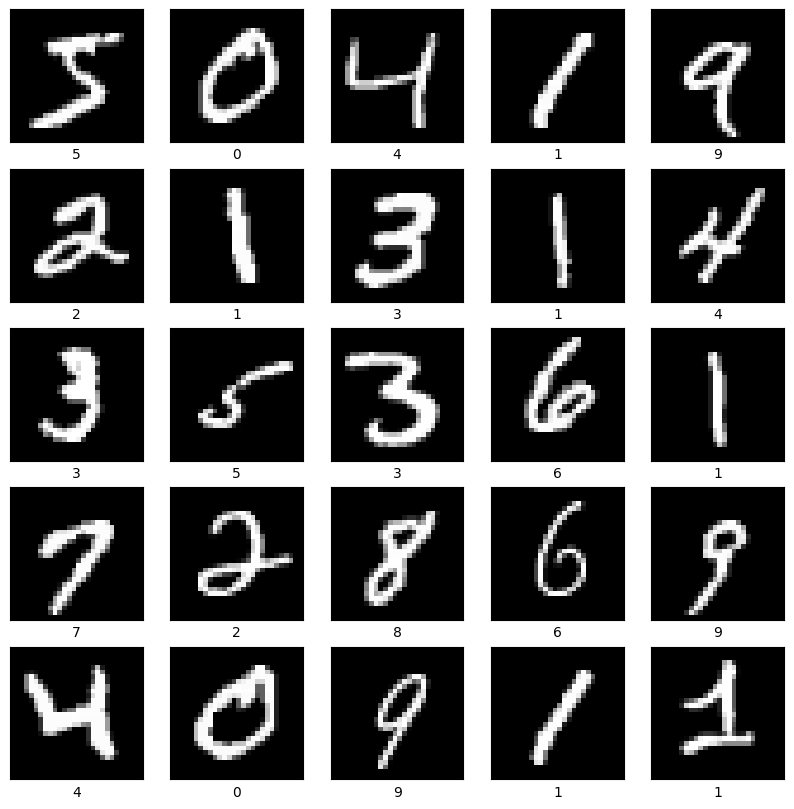

In [ ]:
# Show the first 25 images in the training dataset.
plt.figure(figsize= (10, 10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks ([])
  plt.yticks ([])
  plt.grid(False)
  plt.imshow(np.squeeze(train_images[i], axis=2), cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# Define data augmentation
datagen = keras.preprocessing. image. ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.25,
  height_shift_range=0.25,
  shear_range=0.25,
  zoom_range=0.2
)

# Generate augmented data from MNIST dataset
train_generator = datagen.flow(train_images, train_labels)
test_generator = datagen.flow(test_images, test_labels)

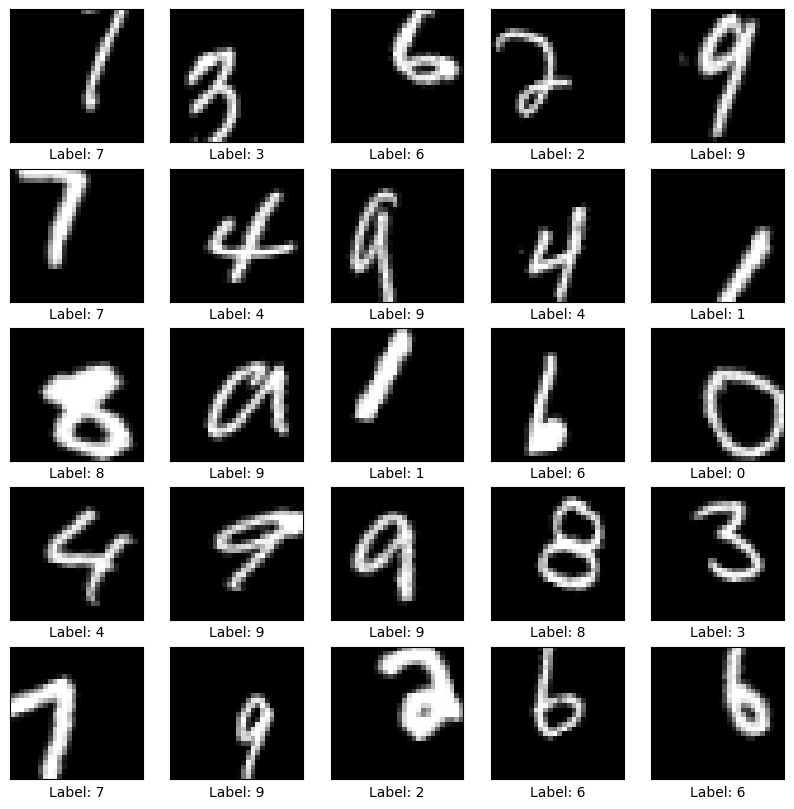

In [ ]:
augmented_images, augmented_labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(augmented_images[i], axis=2), cmap=plt.cm.gray)
  plt.xlabel('Label: %d' % augmented_labels[i])
plt.show()

In [ ]:
#evalute model

base_model.evaluate(test_generator)

313/313 [==============================] - 7s 21ms/step - loss: 5.5150 - accuracy: 0.3309


[5.515011787414551, 0.33090001344680786]

In [ ]:
improved_model = create_model()
improved_model.fit(train_generator, epochs= 5, validation_data = test_generator)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 1.0208 - accuracy: 0.6736 - val_loss: 0.5264 - val_accuracy: 0.8478
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4891 - accuracy: 0.8544 - val_loss: 0.3847 - val_accuracy: 0.8834
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3904 - accuracy: 0.8842 - val_loss: 0.3121 - val_accuracy: 0.9107
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3425 - accuracy: 0.8980 - val_loss: 0.2703 - val_accuracy: 0.9224
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3182 - accuracy: 0.9060 - val_loss: 0.2353 - val_accuracy: 0.9257


save model


In [ ]:
base_model_save_name = 'base_model.h5'
path1 = F"/content/drive/MyDrive/mnist model/{base_model_save_name}"

base_model.save(path1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
improved_model_name = 'improved_model.h5'
path2 = F"/content/drive/MyDrive/mnist model/{improved_model_name}"

improved_model.save(path2)